## Replicable Plots

In [225]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

import hashlib

import yaml

def load_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

file = 'exp01_results.pkl'
df = pd.read_pickle(file)
scenario = file.split('_')[0]
separate_plots = False

if separate_plots:

    FIGSIZE_ONE_COLUMN = (6, 4)
    FIGSIZE_TWO_COLUMN = (14, 4)
    FIGSIZE_TWO_COLUMN_LARGE = (14, 6)
    DPI = 120
    TITLE_FONTSIZE = 14
    LABEL_FONTSIZE = 12
    TICKS_FONTSIZE = 10
    SUPER_TITLE_FONTSIZE = 16
    LINE_WIDTH = 3
    MARKER_1 = 'o'
    PLOT_STYLE = "whitegrid"

    sns.set(style=PLOT_STYLE)

    def epsilons_as_lambda_changes(df, scenario):
        metrics = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
        best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
        for metric in metrics:
            fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics.index(metric)])
        
        plt.figure(figsize=FIGSIZE_TWO_COLUMN_LARGE, dpi=DPI)

        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 3, i)
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
            plt.title(f'{metric} vs $\\lambda$ ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
            plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
            plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
            plt.xticks(fontsize=TICKS_FONTSIZE)
            plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.tight_layout()
        plt.show()

    def thresholds_as_lambda_changes(df, scenario):
        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]

        fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
        fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

        plt.figure(figsize=FIGSIZE_ONE_COLUMN, dpi=DPI)
        
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
        
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
        plt.title(f'$\\tau$ as $\\lambda$ Changes ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)
        plt.grid(True)
        
        plt.show()

    def combined_metrics_and_thresholds_plot(df, scenario):
        metrics = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
        best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
        for metric in metrics:
            fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics.index(metric)])
        
        plt.figure(figsize=FIGSIZE_TWO_COLUMN_LARGE, dpi=DPI)

        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 3, i)
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
            plt.title(f'{metric} vs $\\lambda$ ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
            plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
            plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
            plt.xticks(fontsize=TICKS_FONTSIZE)
            plt.yticks(fontsize=TICKS_FONTSIZE)

        fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
        fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

        plt.subplot(2, 3, 6)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
        plt.title(f'$\\tau$ as $\\lambda$ Changes ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)
        plt.grid(True)

        plt.tight_layout()
        plt.show()


    def best_objective_value_as_lambda_changes(df, scenario):
        fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
        fair_overall_df = fair_overall_df.sort_values('lambda')
        sns.set(style=PLOT_STYLE)

        plt.figure(figsize=FIGSIZE_TWO_COLUMN, dpi=DPI)

        plt.subplot(1, 3, 1)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['best_objective_value'], marker=MARKER_1, color="blue", linewidth=LINE_WIDTH)
        plt.title('Objective Value vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('Objective', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.subplot(1, 3, 2)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['accuracy'], marker=MARKER_1, color='orange', linewidth=LINE_WIDTH)
        plt.title('Accuracy vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('ACC (Overall)', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.subplot(1, 3, 3)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['f1'], marker=MARKER_1, color='green', linewidth=LINE_WIDTH)
        plt.title('F1 vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('F1 (Overall)', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        # plt.suptitle(f'Changing the Lambda Parameter in ApproxThresh Objective Function for {scenario} Scenario', fontsize=SUPER_TITLE_FONTSIZE)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        plt.show()

    epsilons_as_lambda_changes(df, scenario)
    thresholds_as_lambda_changes(df, scenario)
    best_objective_value_as_lambda_changes(df, scenario)
    combined_metrics_and_thresholds_plot(df, scenario)

In [3]:
FIGSIZE_THREE_COLUMN = (6, 9)
DPI = 120
TITLE_FONTSIZE = 14
LABEL_FONTSIZE = 12
TICKS_FONTSIZE = 10
LINE_WIDTH = 3
MARKER_1 = 'o'
PLOT_STYLE = "whitegrid"

race_agg_names = {'1': 'W',
                 '2': 'B',
                 '3': 'A',
                 '4': 'O'}

def combined_metrics_plot(df, scenario):
    metrics_overall = ['best_objective_value', 'accuracy', 'f1']
    colors_overall = ['purple', 'brown', 'black']
    titles_overall = ['Objective Value', 'Accuracy', 'F1 Score']

    metrics_epsilon = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{DP}$'] # '$\\epsilon_{NPV}$', 

    fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
    fair_overall_df = fair_overall_df.sort_values('lambda')
    best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]

    unique_groups = df['dataset_subset'].unique().tolist()
    unique_groups.remove('overall')

    pair_combinations = [(unique_groups[i], unique_groups[j]) for i in range(len(unique_groups)) for j in range(i+1, len(unique_groups))]
    
    for pair in pair_combinations:
        pair_key = str(pair[0]) + '_' + str(pair[1])
        for metric in metrics_epsilon:
            column = metric + '_' + pair_key
            fair_overall_df[column] = best_epsilons.apply(lambda x: x[int(pair[0])][int(pair[1])][metrics_epsilon.index(metric)])
    
    for group in unique_groups:
        fair_overall_df['thresholds_group_' + str(group)] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(int(group)) if x else None)

    plt.figure(figsize=FIGSIZE_THREE_COLUMN, dpi=DPI)
    
    for i in range(3):
        plt.subplot(4, 2, i+1)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metrics_overall[i]], marker=MARKER_1, color=colors_overall[i], linewidth=LINE_WIDTH)
        plt.title(titles_overall[i] + ' vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        # rename y label for best objective value
        if i == 0:
            plt.ylabel('objective', fontsize=LABEL_FONTSIZE)
        else:
            plt.ylabel(metrics_overall[i], fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

    for i, metric in enumerate(metrics_epsilon, 1):
        plt.subplot(4, 2, i+3)
        for pair in pair_combinations:
            pair_key = str(pair[0]) + '_' + str(pair[1])
            column = metric + '_' + pair_key
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[column], label=f'{race_agg_names[pair[0]]} rel. {race_agg_names[pair[1]]}', marker=MARKER_1, linewidth=LINE_WIDTH)
        
        plt.title(f'{metric} vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel(f'{metric}', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)


    plt.subplot(4, 2, 8)
    colors = ['orange', 'green', 'blue', 'red']
    for i, group in enumerate(unique_groups):
        sns.lineplot(x=fair_overall_df['lambda'], color=colors[i], y=fair_overall_df['thresholds_group_' + str(group)], marker=MARKER_1, linewidth=LINE_WIDTH, label=race_agg_names[group])
    # sns.lineplot(x=fair_overall_df['lambda'], color='orange', y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
    # sns.lineplot(x=fair_overall_df['lambda'], color='green', y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
    plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
    plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
    plt.title(f'$\\tau$ as $\\lambda$ Changes', fontsize=TITLE_FONTSIZE)
    plt.xticks(fontsize=TICKS_FONTSIZE)
    plt.yticks(fontsize=TICKS_FONTSIZE)
    plt.legend(fontsize=LABEL_FONTSIZE)
    plt.grid(True)

    # plt.suptitle(f'Comparisons for {scenario}', fontsize=SUPER_TITLE_FONTSIZE)

    plt.tight_layout()
    plt.savefig(scenario + '_column_all.pdf', bbox_inches='tight', dpi=120, format='pdf')
    # plt.show()

combined_metrics_plot(df, scenario)

KeyError: 3

In [32]:
def select_model_helper(df):
    fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
    vals_fairness = fair_overall_df['best_epsilons'].apply(lambda x: sum(x[1][2]))
    vals_utility = fair_overall_df['f1']
    print(vals_fairness)
    print(vals_utility)
    # return the last idxmax if there are multiple
    m = max(vals_utility)
    lambdas = list(fair_overall_df.loc[[i for i, j in vals_utility.items() if j == m]]['lambda'])
    print(lambdas)
    return lambdas
 
lambdas = select_model_helper(df)

6      0.293456
9      0.295580
12     0.312842
15     0.309859
18     0.309661
         ...   
326    0.085465
331    0.159837
342    0.048578
353    0.144942
367    0.132634
Name: best_epsilons, Length: 63, dtype: float64
6      0.757481
9      0.761780
12     0.770716
15     0.770825
18     0.771497
         ...   
326    0.668891
331    0.675967
342    0.848791
353    0.859497
367    0.859915
Name: f1, Length: 63, dtype: float64
[2.0]


### Custom lambdas
Set lambda values in the `lambdas` variable based on your interpretation of the `select_model_helper` results - its subjective!

In [5]:
lambdas = [20.0]

In [19]:
def eo_difference(df, groups):
    tpr_1 = df['tpr'][df['dataset_subset'] == groups[0]].iloc[0]
    tpr_2 = df['tpr'][df['dataset_subset'] == groups[1]].iloc[0]

    fpr_1 = df['fpr'][df['dataset_subset'] == groups[0]].iloc[0]
    fpr_2 = df['fpr'][df['dataset_subset'] == groups[1]].iloc[0]

    return abs(tpr_1 - tpr_2) + abs(fpr_1 - fpr_2)

def demographic_parity_difference(df, groups):
    selection_rate_1 = df['selection_rate'][df['dataset_subset'] == groups[0]].iloc[0]
    selection_rate_2 = df['selection_rate'][df['dataset_subset'] == groups[1]].iloc[0]

    return abs(selection_rate_1 - selection_rate_2)

def predictive_rate_parity_difference(df, groups, negative_class=False):
    
    precision_1 = df['precision'][df['dataset_subset'] == groups[0]].iloc[0]
    precision_2 = df['precision'][df['dataset_subset'] == groups[1]].iloc[0]
    
    if negative_class:
        npv_1 = df['npv'][df['dataset_subset'] == groups[0]].iloc[0]
        npv_2 = df['npv'][df['dataset_subset'] == groups[1]].iloc[0]

        return abs(precision_1 - precision_2) + abs(npv_1 - npv_2)
    
    return abs(precision_1 - precision_2)

def calculate_fairness_metrics(df, lambdas, groups=['1','2']):
    unique_groups = df['dataset_subset'].unique().tolist()
    unique_groups.remove('overall')

    pair_combinations = [(unique_groups[i], unique_groups[j]) for i in range(len(unique_groups)) for j in range(i+1, len(unique_groups))]

    for l in lambdas:
        group_wise_df = df[(df['method'] == 'fair') & (df['dataset_subset'].isin(groups)) & (df['lambda'] == l)]
        print(group_wise_df)
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        
        
        print('APPROX FAIR METRICS')
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))
        print('-----')


        print('ORIGINAL METRICS')
        group_wise_df = df[(df['method'] == 'original') & (df['dataset_subset'].isin(groups))]
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))

        print('HARDT METRICS')
        group_wise_df = df[(df['method'] == 'hardt') & (df['dataset_subset'].isin(groups))]
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))

        # also print AUC and F1 and accuracy
        print('APPROX FAIR OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['accuracy'].iloc[0],4)))
        print('-----')

        print('ORIGINAL OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['accuracy'].iloc[0],4)))
        print('-----')

        print('HARDT OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'hardt') & (df['dataset_subset'] == 'overall')]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'hardt') & (df['dataset_subset'] == 'overall')]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'hardt') & (df['dataset_subset'] == 'overall')]['accuracy'].iloc[0],4)))
        print('-----')

        

calculate_fairness_metrics(df, lambdas, groups=['1','2','3','4'])

      dataset classifier dataset_subset method       tpr       fpr  precision  \
19  ACSIncome        xgb              1   fair  0.840036  0.243017   0.729814   
20  ACSIncome        xgb              2   fair  0.690476  0.288136   0.460317   
46  ACSIncome        xgb              1   fair  0.805556  0.180260   0.773666   
47  ACSIncome        xgb              2   fair  0.825000  0.097345   0.750000   
48  ACSIncome        xgb              3   fair  0.811594  0.249027   0.777778   
80  ACSIncome        xgb              1   fair  0.822160  0.189437   0.766493   
81  ACSIncome        xgb              2   fair  0.629630  0.184874   0.607143   
82  ACSIncome        xgb              3   fair  0.772242  0.205036   0.791971   
83  ACSIncome        xgb              4   fair  0.668874  0.137577   0.601190   

         npv  accuracy        f1  selection_rate       AUC  n_estimators  \
19  0.858274  0.793414  0.781055        0.504900  0.880780           400   
20  0.865979  0.706250  0.552381     

## Custom Plotting Functions

In [226]:
CONFIG_PATH = 'configs/exp01_num_of_groups.yml'

config = load_config(CONFIG_PATH)
datasets_settings = config['datasets_settings']
datasets_settings

{'ACSIncome': ['f1'],
 'ACSInsurance': ['precision'],
 'ACSPoverty': ['f1'],
 'ACSTravelTime': ['f1'],
 'ACSMobility': ['npv']}

In [227]:
def select_model_helper(df):
    fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
    vals_fairness = fair_overall_df['best_epsilons'].apply(lambda x: sum(x[1][2]))
    vals_utility = fair_overall_df['f1']
    print(vals_fairness)
    print(vals_utility)
    # return the last idxmax if there are multiple
    m = max(vals_utility)
    lambdas = list(fair_overall_df.loc[[i for i, j in vals_utility.items() if j == m]]['lambda'])
    print(lambdas)
    return lambdas
 
lambdas = select_model_helper(df)

6      0.293456
9      0.295580
12     0.312842
15     0.309859
18     0.309661
29     0.151324
33     0.273347
37     0.351955
41     0.360278
45     0.378168
59     0.177525
64     0.177525
69     0.345722
74     0.405894
79     0.405894
90     0.097889
93     0.115228
96     0.313644
99     0.088792
102    0.286699
113    0.060032
117    0.061270
121    0.061162
125    0.061125
129    0.061125
143    0.060992
148    0.060992
153    0.060992
158    0.060992
163    0.060992
174    0.096322
177    0.231191
180    0.240460
183    0.228354
186    0.237451
197    0.091448
201    0.091448
205    0.210528
209    0.225472
213    0.226611
227    0.123713
232    0.090597
237    0.258269
242    0.258269
247    0.245601
258    0.082176
261    0.117605
264    0.164051
267    0.249732
270    0.240190
281    0.124871
285    0.124433
289    0.197312
293    0.238558
297    0.238558
311    0.065823
316    0.065823
321    0.065823
326    0.085465
331    0.159837
342    0.048578
353    0.144942
367    0

In [229]:
#df[df['dataset']=='ACSIncome']

In [230]:
df1_raw = df[(df['lambda']==20.0) | (df['lambda'].isnull())] # Select correct lambda values (or NaN for 'original' method)
df1_raw = df1_raw[df1_raw['method'] != 'hardt'] # We don't need Hardt

In [232]:
#df1_raw[df1_raw['dataset']=='ACSIncome']

In [233]:
def pairwise_dp_diffs(selection_rates):
    pairwise_diffs = [abs(x - y) for i,x in enumerate(selection_rates) for j,y in enumerate(selection_rates) if i < j]
    return sum(pairwise_diffs)

def pairwise_pvp_diffs(precisions):
    pairwise_diffs = [abs(x - y) for i,x in enumerate(precisions) for j,y in enumerate(precisions) if i < j]
    return sum(pairwise_diffs)

def pairwise_eo_diffs(tprs,fprs):
    pairwise_diffs_tprs = [abs(x - y) for i,x in enumerate(tprs) for j,y in enumerate(tprs) if i < j]
    pairwise_diffs_fprs = [abs(x - y) for i,x in enumerate(fprs) for j,y in enumerate(fprs) if i < j]

    return sum(pairwise_diffs_tprs) + sum(pairwise_diffs_fprs)

# Models are keyed by dataset, method, n_estimators, min_child_weight, max_depth, learning_rate, num_groups_included
# Key dataframe to make selection easier ... this is non-generalazible but it makes this section of code more efficient
df1 = df1_raw.set_index(['dataset', 'method','n_estimators', 'min_child_weight', 'max_depth', 'learning_rate', 'num_groups_included'])
df1['dp'] = 0.0
df1['pvp'] = 0.0
df1['eo'] = 0.0

for x in set(df1.index):
    temp_df = None
    temp_df = df1.loc[x]
    #print(temp_df.shape)
    
    num_groups = temp_df.index.get_level_values('num_groups_included')[0]
    tprs = []
    fprs = []
    precisions = []
    selection_rates = []
    for n in range(1,num_groups+1):
        tprs.append(temp_df[temp_df['dataset_subset']==str(n)]['tpr'][0]) # Note that dataset_subset is a string based on the sensitive attribute value
        fprs.append(temp_df[temp_df['dataset_subset']==str(n)]['fpr'][0])
        precisions.append(temp_df[temp_df['dataset_subset']==str(n)]['precision'][0])
        selection_rates.append(temp_df[temp_df['dataset_subset']==str(n)]['selection_rate'][0])
    
    df1.at[x]['dp'] = pairwise_dp_diffs(selection_rates)
    df1.at[x]['pvp'] = pairwise_pvp_diffs(precisions)
    df1.at[x]['eo'] = pairwise_eo_diffs(tprs,fprs)

In [234]:
df2 = df1.reset_index()

In [235]:
#df2[df2['dataset']=='ACSIncome']

In [236]:
temp_df = None
temp_df = df2.drop_duplicates(subset=['dataset','method','num_groups_included'])
temp_df

,dataset,method,n_estimators,min_child_weight,max_depth,learning_rate,num_groups_included,classifier,dataset_subset,tpr,fpr,precision,npv,accuracy,f1,selection_rate,AUC,best_objective_value,best_thresholds,best_epsilons,max_epsilon,lambda,global_metric,sensitive_attr,groups_included,dp,pvp,eo
0,ACSIncome,original,400,10,3,0.05,2,xgb,overall,0.763997,0.171613,0.769297,0.824134,0.800812,0.766638,0.425304,0.878455,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded,"1,2",0.219510,0.115666,0.300178
3,ACSIncome,fair,400,10,3,0.05,2,xgb,overall,0.834625,0.246452,0.717246,0.858824,0.788270,0.771497,0.498340,0.878455,4.066228,"{1: 0.3870967741935484, 2: 0.3225806451612903}","{1: {2: [0.004497645211930967, 0.0341987682647...",1.0,20.0,f1,RAC1P_recoded,"1,2",0.111150,0.269496,0.194678
6,ACSIncome,original,400,1,3,0.10,3,xgb,overall,0.775838,0.172772,0.778556,0.824973,0.804661,0.777195,0.437596,0.889432,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded,"1,2,3",0.617469,0.150073,0.706948
10,ACSIncome,fair,400,1,3,0.10,3,xgb,overall,0.807263,0.184800,0.773762,0.843803,0.811714,0.790157,0.458142,0.889432,4.487398,"{1: 0.4594594594594595, 2: 0.40540540540540543...","{1: {2: [0.07593545908567034, 0.01633045034297...",1.0,20.0,f1,RAC1P_recoded,"1,2,3",0.505512,0.055556,0.342253
14,ACSIncome,original,400,10,3,0.05,4,xgb,overall,0.773718,0.154948,0.771739,0.846522,0.816253,0.772727,0.404762,0.895214,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded,"1,2,3,4",1.139551,0.636889,1.473426
19,ACSIncome,fair,400,10,3,0.05,4,xgb,overall,0.791667,0.180122,0.748485,0.853207,0.808489,0.769470,0.427019,0.895214,6.618084,"{1: 0.4666666666666667, 2: 0.4666666666666667,...","{1: {2: [0.03387699476854089, 0.04282013609650...",1.0,20.0,f1,RAC1P_recoded,"1,2,3,4",0.818724,0.731691,0.887899
24,ACSInsurance,original,400,10,3,0.05,2,xgb,overall,0.010168,0.002088,0.462428,0.850926,0.849644,0.019898,0.003301,0.715264,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded,"1,2",0.003511,0.462428,0.012778
27,ACSInsurance,fair,400,10,3,0.05,2,xgb,overall,0.000064,0.000045,0.200000,0.849894,0.849863,0.000127,0.000048,0.715264,0.727302,"{1: 0.6271186440677966, 2: 0.3898305084745763}","{1: {2: [0.004894583439745043, 0.0001504098668...",1.0,20.0,precision,RAC1P_recoded,"1,2",0.000458,0.333333,0.002090
30,ACSInsurance,original,100,1,9,0.05,3,xgb,overall,0.019656,0.002538,0.582298,0.849671,0.848294,0.038029,0.005150,0.712921,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded,"1,2,3",0.018983,0.575332,0.076628
34,ACSInsurance,fair,100,1,9,0.05,3,xgb,overall,0.000419,0.000000,1.000000,0.847501,0.847511,0.000838,0.000064,0.712921,0.290763,"{1: 0.6756756756756757, 2: 0.7297297297297298,...","{1: {2: [0.0010267146004660983, 0.0, 0.0, 0.06...",1.0,20.0,precision,RAC1P_recoded,"1,2,3",0.000142,2.000000,0.000917


AttributeError: 'function' object has no attribute 'remove'

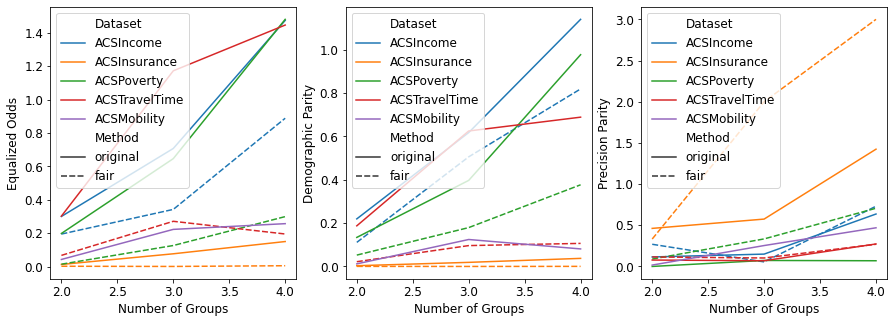

In [261]:
plt.rcParams['font.size'] = 12
temp_df.rename(columns={"num_groups_included": "Number of Groups",
                       "eo": "Equalized Odds",
                       "dp": "Demographic Parity",
                       "pvp": "Precision Parity",
                       "dataset": "Dataset",
                       "method": "Method"},inplace=True)
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))

sns.lineplot(ax=axes[0], data=temp_df, x="Number of Groups", y="Equalized Odds", hue="Dataset",style="Method")
sns.lineplot(ax=axes[1], data=temp_df, x="Number of Groups", y="Demographic Parity", hue="Dataset",style="Method")
sns.lineplot(ax=axes[2], data=temp_df, x="Number of Groups", y="Precision Parity", hue="Dataset",style="Method")

for i in range(0,(3)):
    ax[i].set_xlim(1.8,4.2)
    ax[i].set_xticks(range(2,5))
    
ax[0].